# Question 2

ln L_max_20 = -5.388091
f_20 = 1.489109
ln L_max_20 - 0.5 = -5.888091
Uncertainty on f_20 = 0.047685 
ln L_max_100 = -35.166601
f_100 = 1.489109
ln L_max_100 - 0.5 = -35.666601
Uncertainty on f_100 = 0.011173 
Ratio of uncertainty between f_20 and f_100 is 4.267812
The ratio is ~4x of which one sample is 20 and the other 100 which is about ~5x, so it is consistent


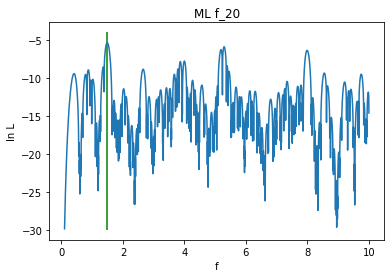

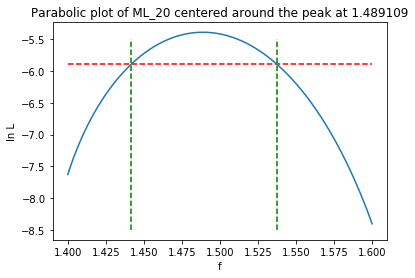

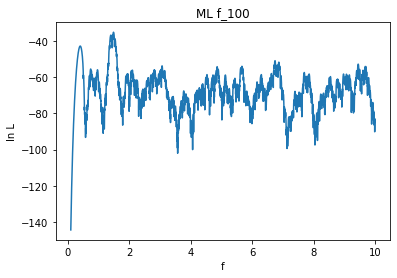

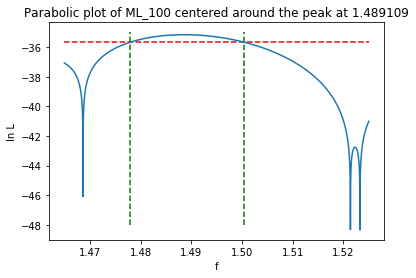

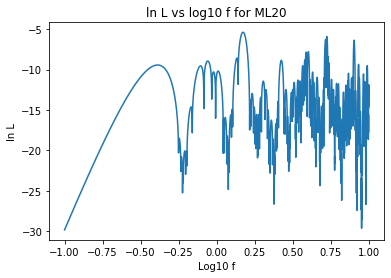

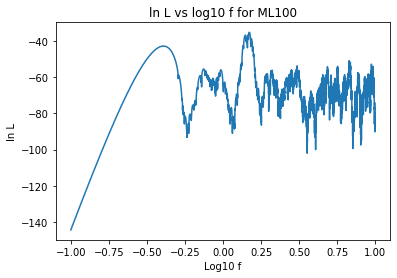

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def F(f,t):
    return np.abs(np.sin(2*np.pi *f *t))

def L(f,t):
    return np.log(np.prod(F(f,t)))

ml_sample_1 = np.loadtxt("ml_sample_1.txt")
ml_sample_2 = np.loadtxt("ml_sample_2.txt")


x = np.linspace(0.1,10,10000)
l1 = [L(f,ml_sample_1) for f in x]

plt.figure()
plt.plot(x,l1)
plt.xlabel('f')
plt.ylabel('ln L')
plt.title('ML f_20')

plt.vlines(x[np.where(l1==np.max(l1))], -30, -4, color='green', linestyle='solid')

print('ln L_max_20 = %f' %np.max(l1))
print('f_20 = %f' %x[np.where(l1==np.max(l1))])

sigma_f20 = np.max(l1) - 0.5
print('ln L_max_20 - 0.5 = %f' %sigma_f20)

y_f20 = np.linspace(1.4,1.6,10000)
y1_f20 = [L(f,ml_sample_1) for f in y_f20]

plt.figure()
plt.plot(y_f20,y1_f20)
plt.xlabel('f')
plt.ylabel('ln L')
plt.title('Parabolic plot of ML_20 centered around the peak at %f' %x[np.where(l1==np.max(l1))])

plt.hlines(sigma_f20, 1.4,1.6, color='red', linestyle='dashed')
#sigmaplus = y[np.where(y1>)]
#print(sigmaplus)
idx_f20 = np.argwhere(np.diff(np.sign(y1_f20 - sigma_f20))).flatten()
#print(idx_f20)
#print(y[2092])
#print(y[6860])

plt.vlines(y_f20[2092], -8.5, -5.5, color='green', linestyle='dashed')
plt.vlines(y_f20[6860], -8.5, -5.5, color='green', linestyle='dashed')

deltaf_plus_f20 = x[np.where(l1==np.max(l1))] - y_f20[2092]
deltaf_minus_f20 = y_f20[6860]- x[np.where(l1==np.max(l1))]

var_f20 = (deltaf_plus_f20 + deltaf_minus_f20)/2.0
print('Uncertainty on f_20 = %f ' %var_f20)

###############################################
l2 = [L(f,ml_sample_2) for f in x]

plt.figure()
plt.plot(x,l2)
plt.xlabel('f')
plt.ylabel('ln L')
plt.title('ML f_100')

print('ln L_max_100 = %f' %np.max(l2))
print('f_100 = %f' %x[np.where(l2==np.max(l2))])

sigma_f100 = np.max(l2) - 0.5
print('ln L_max_100 - 0.5 = %f' %sigma_f100)

y_f100 = np.linspace(1.465,1.525,10000)
y1_f100 = [L(f,ml_sample_2) for f in y_f100]

plt.figure()
plt.plot(y_f100,y1_f100)
plt.xlabel('f')
plt.ylabel('ln L')
plt.title('Parabolic plot of ML_100 centered around the peak at %f' %x[np.where(l2==np.max(l2))])

plt.hlines(sigma_f100, 1.465,1.525, color='red', linestyle='dashed')
#sigmaplus = y[np.where(y1>)]
#print(sigmaplus)
idx_f100 = np.argwhere(np.diff(np.sign(y1_f100 - sigma_f100))).flatten()
#print(idx_f100)
#[2170 5894]
#print(y_f100[2170])
#print(y_f100[5894])

plt.vlines(y_f100[2170], -48, -35, color='green', linestyle='dashed')
plt.vlines(y_f100[5894], -48, -35, color='green', linestyle='dashed')

deltaf_plus_f100 = x[np.where(l2==np.max(l2))] - y_f100[2170]
deltaf_minus_f100 = y_f100[5894]- x[np.where(l1==np.max(l1))]

var_f100 = (deltaf_plus_f100 + deltaf_minus_f100)/2.0
print('Uncertainty on f_100 = %f ' %var_f100)

l3 = np.log10(x)

plt.figure()
plt.plot(l3,l1)
plt.xlabel('Log10 f')
plt.ylabel('ln L')
plt.title('ln L vs log10 f for ML20')


plt.figure()
plt.plot(l3,l2)
plt.xlabel('Log10 f')
plt.ylabel('ln L')
plt.title('ln L vs log10 f for ML100')

print('Ratio of uncertainty between f_20 and f_100 is %f' %(var_f20/var_f100))
print('The ratio is ~4x of which one sample is 20 and the other 100 which is about ~5x, so it is consistent')

In conclusion: For the data set with 20 occurances
$$ ln L_{max,20} = -5.388091 $$
$$ \hat{f}_{20} = 1.489109 $$
$$ \sigma_{\hat{f}20} = 0.047685 $$

For the data set with 100 occurances 

$$ ln L_{max,100} = -35.166601 $$
$$ \hat{f}_{100} = 1.489109 $$
$$ \sigma_{\hat{f}100} = 0.011173 $$

The ratio between $\hat{f}_20$ and $\hat{f}_100$ is $4.267812$ which is pretty close to the expected number 5 as there are 5 times more values in the second sample when compared to the first sample, so the ratio is consistent with the different sizes. 




# Method and comments

To determine the ML estimate for the data samples I plotted 10000 linearly spaced numbers between $0.1-10 Hz$ against the equation below

$$ ln \prod^n_{i=1} f(x_i, \theta) $$

Where $f$ was the pdf in which we assumed the data set would follow. I then found the peak value on this plot to which the y-value would correspond to $ln L_{max}$ and the x-value would correspond to the ML estimator. This was repeated for both $\hat{f}_{20}$ and $\hat{f}_{100}$ for both (i) and (iii).

For the uncertainty I used the graphical method and 'shrunk' the original plots down so that it only covered the max peak. I then found the y value using 
$$ ln L_{max} - \frac{1}{2} $$

And found the corresponding value on the x axis to which there were two. One would be the ML estimator + the variance and the other would be the ML estimator - the variance, so this could be rearranged easily to find the uncertainty by taking the mean (or dividing by 2) 

The ratio between the uncertainty of $\hat{f}_{20}$ and $\hat{f}_{100}$ was done by dividing one by the other. 

As we can see the ML estimators are equal but with uncertainty ~5x greater in the data with 100 occurances than with 20 as expected. 